In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sn
%matplotlib inline
sn.set_style("darkgrid")

In [2]:
df12 = pd.read_csv("./01_district_wise_crimes_committed_ipc_2001_2012.csv")
df13 = pd.read_csv("./01_district_wise_crimes_committed_ipc_2013.csv")
df14 = pd.read_csv("./01_district_wise_crimes_committed_ipc_2014.csv")

In [3]:
df = pd.concat([df12, df13, df14],sort=False)

In [4]:
df12.shape, df13.shape, df14.shape, df.shape

((9017, 33), (823, 33), (838, 91), (10678, 102))

In [5]:
df['state_ut'] = df.state_ut.str.replace('\s+&\s+', '&')
df['district_ut'] = df.district.apply(lambda x: x.replace('\s+&\s+', '&'))

In [6]:
no_total = df.loc[df.district != 'Total', :]

In [7]:
yr_totals = no_total.groupby('year')
yr_agg = yr_totals.sum().reset_index()

In [8]:
for cl in yr_agg.columns:
    if cl == 'year':
        continue
    if yr_agg[cl].isnull().sum() > 10:
        yr_agg = yr_agg.drop(cl, axis=1)
    else:
        mean_cl = np.mean(yr_agg[cl])
        yr_agg[cl] = yr_agg[cl].fillna(mean_cl)
        yr_agg[cl] = yr_agg[cl].apply(lambda x: x/10000)

In [9]:
yr_agg.describe()

,year,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,kidnapping_abduction,kidnapping_and_abduction_of_women_and_girls,kidnapping_and_abduction_of_others,...,other_offences_against_state,offences_promoting_enmity_between_different_groups,promoting_enmity_between_different_groups,imputation_assertions_prejudicial_to_national_integration,extortion,disclosure_of_identity_of_victims,incidence_of_rash_driving,humantrafficking,unnatural_offence,total_cognizable_ipc_crimes
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2007.5000,6.712543,5.534200,0.733471,4.450314,0.003229,3.897386,6.396200,4.511257,1.521857,...,0.001857,0.004814,0.004629,0.000186,0.117286,0.001929,5.855100,0.010371,0.016400,40.841986
std,4.1833,0.235199,1.688546,0.043983,1.323300,0.010534,1.454457,2.598971,2.593781,0.562093,...,0.006949,0.018013,0.017319,0.000695,0.438843,0.007216,21.907778,0.038806,0.061363,152.816718
min,2001.0000,6.463600,0.000000,0.669800,3.169400,0.000000,0.000000,3.998400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.2500,6.543350,5.504650,0.709150,3.652900,0.000200,3.367050,4.591150,2.975650,1.419550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.5000,6.653600,5.763600,0.726800,4.213400,0.000300,4.008200,5.297700,3.783000,1.509300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.7500,6.852450,6.226750,0.768550,4.739500,0.000550,4.398250,7.459000,5.756300,1.702700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.0000,7.240400,7.083400,0.805800,7.735600,0.039800,6.741200,13.092200,10.376200,2.716000,...,0.026000,0.067400,0.064800,0.002600,1.642000,0.027000,81.971400,0.145200,0.229600,571.787800


In [10]:
group_by = ["state_ut"]
columns_of_interest = ["total_ipc_crimes"]
state_grp = no_total[columns_of_interest + group_by].groupby(["state_ut"])
state_agg = state_grp.sum().reset_index().sort_values(by='total_ipc_crimes')
state_agg['total_ipc_crimes'] = state_agg.total_ipc_crimes

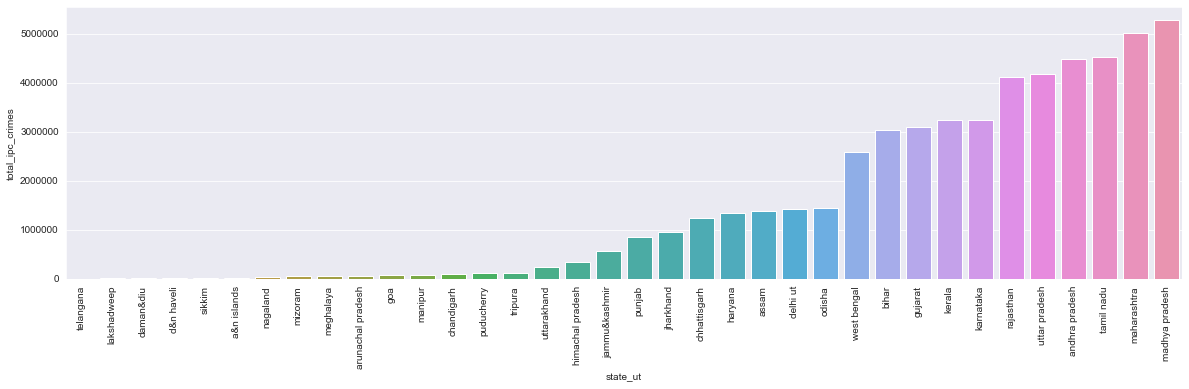

In [11]:
fig = mplt.figure()
fig.set_size_inches(20, 5)
ax = fig.add_subplot(111)
ax.set_xticklabels(state_agg.state_ut, rotation=90)
b = sn.barplot(x='state_ut', y='total_ipc_crimes', data=state_agg, ax=ax)